# imports

In [1]:
import json
import matplotlib.pyplot as plt

# Flow
1. Load scores
2. ID the highest scoring value for each sequence
3. Tag those positions with different colors
4. Plot all scores

## 1. Load scores

In [2]:
# load scores
scores = json.load(open('./scores.json', 'r'))

## 2. ID highest scoring for each

In [3]:
b_prefixes = ['DLQT', 'DPQVAQLEL', 'DL', 'DLQT', 'DLQT', 'DLQT', 'DLQT', 'DLQT']
y_suffixes = ['LLL', 'GGGPGAG', 'SPMTKG', 'SRM', 'AAR', 'AAR', 'VE', 'VE']


In [4]:
def get_highest_ix(i, scores, ion):
    correct_ix = b_prefixes[i] if ion == 'b' else y_suffixes[i]
    
    for j, (kmer, _) in enumerate(scores):
        if ion == 'y':
            if kmer[-(len(correct_ix)):] == correct_ix:
                return j
            
        else:
            if kmer[:len(correct_ix)] == correct_ix:
                return j

DLQT: 0 	 LLL: 91
DPQVAQLEL: 0 	 GGGPGAG: 0
DL: 12 	 SPMTKG: 0
DLQT: 2 	 SRM: 0
DLQT: 32 	 AAR: 3
DLQT: 9 	 AAR: 5
DLQT: 28 	 VE: 1
DLQT: 0 	 VE: 1


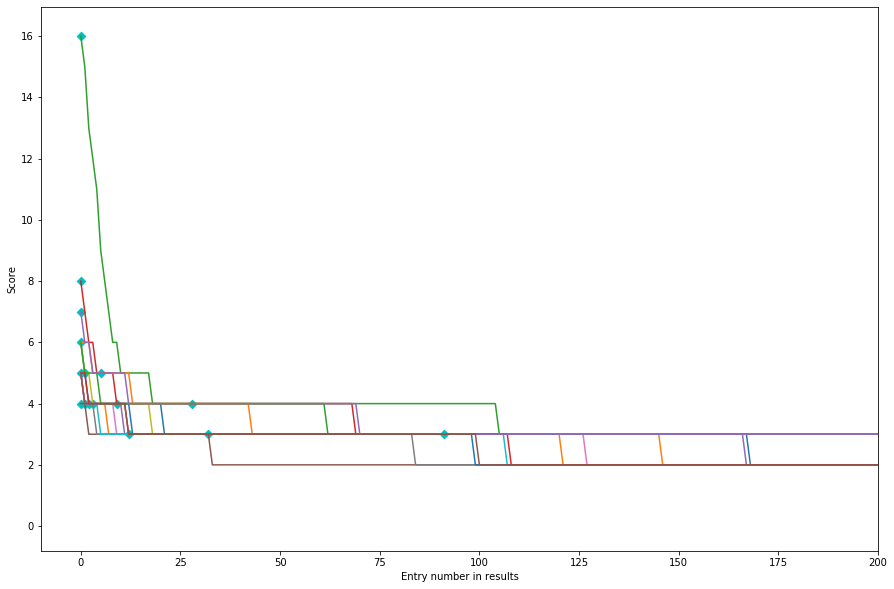

In [8]:
plt.figure(figsize=(15,10))

score_pos = []

for i, score_dict in scores.items():
    b_scores = score_dict['b']
    y_scores = score_dict['y']
        
    plt.plot([x[1] for x in b_scores])
    plt.plot([x[1] for x in y_scores])
    
    best_b = get_highest_ix(int(i), b_scores, 'b')
    best_y = get_highest_ix(int(i), y_scores, 'y')
    
    score_pos.append((best_b, best_y))
        
    plt.scatter([best_b], [b_scores[best_b][1]], c='c', marker='D')
    plt.scatter([best_y], [y_scores[best_y][1]], c='c', marker='D')
    
plt.xlabel('Entry number in results')
plt.ylabel('Score')

plt.xlim(-10, 200)
    
for i, scores in enumerate(score_pos):
    print(f'{b_prefixes[i]}: {scores[0]} \t {y_suffixes[i]}: {scores[1]}')